In [12]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tools import *
%matplotlib inline

In [9]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [10]:
x_train.shape

(60000, 784)

In [11]:
pca = PCA(n_components=1)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
file_size_PCA = []
mse_loss_PCA = []
for i in range(196):
    pca = PCA(n_components=i+1)
    pca.fit(x_train)
    file_size_PCA.append(4 * (i+1) / 784)
    x_test_auto = pca.inverse_transform(pca.transform(x_test))
    mse_loss_PCA.append(np.mean(np.linalg.norm(x_test_auto-x_test, axis=(1), ord=2)))
    print(file_size_PCA[-1], mse_loss_PCA[-1])

0.00510204081632653 6.8259892
0.01020408163265306 6.5211725
0.015306122448979591 6.2824006
0.02040816326530612 6.060056
0.025510204081632654 5.8415127
0.030612244897959183 5.6442304
0.03571428571428571 5.484271
0.04081632653061224 5.3452806
0.04591836734693878 5.209733
0.05102040816326531 5.0960116
0.05612244897959184 4.9844255
0.061224489795918366 4.871116
0.0663265306122449 4.782058
0.07142857142857142 4.6882114
0.07653061224489796 4.5929775
0.08163265306122448 4.509831
0.08673469387755102 4.435834
0.09183673469387756 4.360671
0.09693877551020408 4.290703
0.10204081632653061 4.2203894
0.10714285714285714 4.1553493
0.11224489795918367 4.092718
0.11734693877551021 4.0304127
0.12244897959183673 3.9741273
0.12755102040816327 3.916728
0.1326530612244898 3.861275
0.1377551020408163 3.8045487
0.14285714285714285 3.752254
0.14795918367346939 3.704216
0.15306122448979592 3.655225
0.15816326530612246 3.610341
0.16326530612244897 3.5651855
0.1683673469387755 3.5229383
0.17346938775510204 3.4813

In [41]:
import pickle as pk
pk.dump([file_size_PCA, mse_loss_PCA], open('log_PCA', 'wb'))

In [99]:
pca = PCA(n_components=120)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

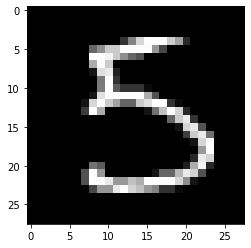

In [96]:
plt.imshow(x_test[15].reshape(28, 28))
plt.gray()

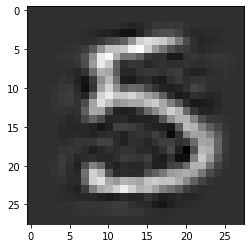

In [100]:
plt.imshow(pca.inverse_transform(pca.transform([x_test[15]])).reshape(28, 28))
plt.gray()

In [101]:
mse_loss_PCA[120]

1.8457688

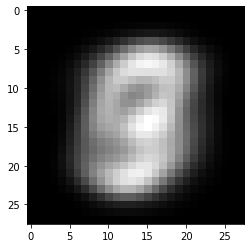

In [82]:
plt.imshow(pca.inverse_transform(a).reshape(28, 28))
plt.gray()

In [44]:
pca.inverse_transform(pca.transform([x_test[0]]))

array([[-1.81453331e-07, -1.58872240e-07, -4.07465791e-07,
        -3.32709192e-07, -2.86748786e-07,  2.57297273e-07,
         6.07425577e-08,  1.51279323e-07, -3.52892968e-08,
         1.59467177e-08, -4.02851832e-08,  6.09738819e-08,
         1.41809447e-04,  2.91557371e-04, -2.11324223e-05,
        -8.98470660e-07,  1.02866506e-08,  3.59728745e-08,
         6.79708876e-08,  8.09987739e-08, -8.17204509e-08,
        -8.49891322e-08, -1.11697439e-07, -5.99565908e-08,
        -1.35961926e-07, -7.34248706e-09,  6.40505178e-08,
        -2.11225938e-07, -4.51051330e-09, -3.08015942e-08,
        -5.32418873e-08, -7.14244024e-08,  3.62391347e-06,
         1.85469835e-05,  3.97436583e-04,  6.01306441e-04,
         1.95502318e-04,  4.14909009e-05,  8.73428187e-04,
         1.34680618e-03,  1.60123780e-03,  1.26199180e-03,
         2.90832861e-04,  1.13034295e-03,  7.63711229e-04,
        -2.42350507e-05,  3.52734758e-04,  9.93415015e-04,
         1.25628675e-03,  3.31919000e-04,  4.68672952e-0